# Evaluate Pretrained `super-image` Models

---

[Github](https://github.com/eugenesiow/super-image) | All Models @ [huggingface.co](https://huggingface.co/models?filter=super-image) | All Datasets @ [huggingface datasets](https://huggingface.co/datasets?filter=task_ids:other-other-image-super-resolution)

---

Notebook to evaluate pretrained `super-image` models with common image super resolution datasets.

The notebook is structured as follows:
* Setting up the Environment
* Loading the dataset
* Evaluating the Model (Running Inference)

## Setting up the Environment

#### Install the library

We will install the `super-image` and huggingface `datasets` library using `pip install`.

In [62]:
!pip install -qq datasets super-image

## Loading the dataset

We download the [`Set5`]() dataset using the huggingface `datasets` library. You can explore more super resolution datasets [here](https://huggingface.co/datasets?filter=task_ids:other-other-image-super-resolution).

In [63]:
from datasets import load_dataset

dataset = load_dataset('eugenesiow/Set5', 'bicubic_x2', split='validation')

RuntimeError: Dataset scripts are no longer supported, but found Set5.py

The following code will show the the first image (high resolution and the low resolution (half sized) images) from the dataset in the notebook.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Assuming eval_dataset is a list of dictionaries with 'hr' and 'lr' keys containing file paths
# To display the first image:
if eval_dataset and len(eval_dataset) > 0:
    first_sample = eval_dataset[0]

    # Read the high-resolution image
    hr_image_path = first_sample['hr']
    hr_image = cv2.imread(hr_image_path)

    # Read the low-resolution image
    lr_image_path = first_sample['lr']
    lr_image = cv2.imread(lr_image_path)

    if hr_image is not None:
        print("Displaying High Resolution Image:")
        cv2_imshow(hr_image)
    else:
        print(f"Could not read HR image from {hr_image_path}")

    if lr_image is not None:
        print("Displaying Low Resolution Image:")
        cv2_imshow(lr_image)
    else:
         print(f"Could not read LR image from {lr_image_path}")
else:
    print("eval_dataset is empty or not properly loaded.")

## Evaluating the Model (Running Inference)

To evaluate the a model for the [PSNR](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio#Quality_estimation_with_PSNR) and [SSIM](https://en.wikipedia.org/wiki/Structural_similarity#Algorithm) metrics we run the following code:

* `EvalDataset(dataset)` converts the dataset to an evaluation dataset that can be fed in to a PyTorch dataloader.
* `EdsrModel.from_pretrained` - Download and load a small, pre-trained deep-learning model to the `model` variable. You can replace this with [other](https://huggingface.co/models?filter=super-image) pretrained models.
* `EvalMetrics().evaluate(model, eval_dataset)` - Run the evaluation on the `eval_dataset` using the `model`.

In [65]:
from super_image import EdsrModel
from super_image.data import EvalDataset, EvalMetrics

# Use the eval_dataset that was successfully created from the BSDS300 data
# eval_dataset = EvalDataset(dataset) # This line caused the NameError
model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
EvalMetrics().evaluate(model, eval_dataset)

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


Evaluating dataset:   0%|          | 0/100 [00:00<?, ?it/s]

scale:2      eval psnr: 29.76     ssim: 0.8210


We can see from the output that the PSNR for this model on this dataset is `38.02` and the SSIM is `0.9607`.

In [ ]:
from datasets import load_dataset

dataset = load_dataset('eugenesiow/Set5', 'bicubic_x2', split='validation', download_mode="force_redownload")

In [ ]:
import requests

url = "https://raw.githubusercontent.com/huggingface/datasets/main/datasets/Set5/Set5.py"
response = requests.get(url)
with open("Set5.py", "w") as f:
    f.write(response.text)

In [ ]:
from datasets import load_dataset

dataset = load_dataset('./Set5.py', 'bicubic_x2', split='validation')

In [ ]:
from datasets import load_dataset

# Load a different dataset suitable for super resolution
dataset = load_dataset('eugenesiow/BSDS300', 'bicubic_x2', split='validation')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adheshgarg/bsds300")

print("Path to dataset files:", path)

In [ ]:
import os
from PIL import Image
from super_image.data import EvalDataset

# Assuming the downloaded path contains subdirectories for high and low resolution images
# You might need to adjust the paths based on the actual structure of the downloaded dataset
hr_images_path = os.path.join(path, 'BSDS300', 'HR')
lr_images_path = os.path.join(path, 'BSDS300', 'LR_bicubic', 'X2') # Assuming X2 scaling

# Get list of image files
hr_image_files = sorted([os.path.join(hr_images_path, f) for f in os.listdir(hr_images_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
lr_image_files = sorted([os.path.join(lr_images_path, f) for f in os.listdir(lr_images_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Create a list of dictionaries, each representing a data sample
dataset_list = []
for hr_file, lr_file in zip(hr_image_files, lr_image_files):
    dataset_list.append({
        'hr': hr_file,
        'lr': lr_file
    })

# Create the EvalDataset from the list of dictionaries
eval_dataset = EvalDataset(dataset_list)

print(f"Loaded {len(eval_dataset)} samples into EvalDataset.")

In [ ]:
import os

# List the contents of the downloaded dataset directory
print(os.listdir(path))

In [ ]:
import zipfile
import os

# Define the path to the uploaded zip file
zip_path = 'archive.zip'

# Define the directory where the contents will be extracted
extract_path = 'bsds300_extracted'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"'{zip_path}' unzipped to '{extract_path}'")

# List the contents of the extracted directory to help identify image folders
print("Contents of extracted directory:")
print(os.listdir(extract_path))

In [ ]:
import os
from PIL import Image
from super_image.data import EvalDataset

# Assuming the extracted directory has a structure like extract_path/BSDS300/HR and extract_path/BSDS300/LR_bicubic/X2
# Adjust these paths based on the actual contents listed in the previous cell
base_path = os.path.join(extract_path, 'BSDS300') # Adjust 'BSDS300' if needed
hr_images_path = os.path.join(base_path, 'HR')
lr_images_path = os.path.join(base_path, 'LR_bicubic', 'X2') # Adjust 'LR_bicubic/X2' if needed

# Get list of image files
hr_image_files = sorted([os.path.join(hr_images_path, f) for f in os.listdir(hr_images_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
lr_image_files = sorted([os.path.join(lr_images_path, f) for f in os.listdir(lr_images_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])

# Create a list of dictionaries, each representing a data sample
dataset_list = []
for hr_file, lr_file in zip(hr_image_files, lr_image_files):
    dataset_list.append({
        'hr': hr_file,
        'lr': lr_file
    })

# Create the EvalDataset from the list of dictionaries
eval_dataset = EvalDataset(dataset_list)

print(f"Loaded {len(eval_dataset)} samples into EvalDataset.")

In [ ]:
import zipfile
import os

# Define the path to the uploaded zip file
zip_path = 'BSDS300.zip'

# Define the directory where the contents will be extracted
extract_path = 'bsds300_extracted'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"'{zip_path}' unzipped to '{extract_path}'")

# List the contents of the extracted directory to help identify image folders
print("Contents of extracted directory:")
print(os.listdir(extract_path))

In [ ]:
import os
from PIL import Image
from super_image.data import EvalDataset

# Assuming the extracted directory has a structure like extract_path/BSDS300/HR and extract_path/BSDS300/LR_bicubic/X2
# Adjust these paths based on the actual contents listed in the previous cell
base_path = os.path.join(extract_path, 'BSDS300') # Adjust 'BSDS300' if needed
hr_images_path = os.path.join(base_path, 'HR')
lr_images_path = os.path.join(base_path, 'LR_bicubic', 'X2') # Adjust 'LR_bicubic/X2' if needed

# Get list of image files
hr_image_files = sorted([os.path.join(hr_images_path, f) for f in os.listdir(hr_images_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
lr_image_files = sorted([os.path.join(lr_images_path, f) for f in os.listdir(lr_images_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])

# Create a list of dictionaries, each representing a data sample
dataset_list = []
for hr_file, lr_file in zip(hr_image_files, lr_image_files):
    dataset_list.append({
        'hr': hr_file,
        'lr': lr_file
    })

# Create the EvalDataset from the list of dictionaries
eval_dataset = EvalDataset(dataset_list)

print(f"Loaded {len(eval_dataset)} samples into EvalDataset.")

In [ ]:
import os

# List the contents of the 'bsds300_extracted/BSDS300' directory
print(os.listdir(os.path.join(extract_path, 'BSDS300')))

In [ ]:
import os

# List the contents of the 'bsds300_extracted/BSDS300/images' directory
print(os.listdir(os.path.join(extract_path, 'BSDS300', 'images')))

In [ ]:
import os

# List the contents of the 'bsds300_extracted/BSDS300/images/test' directory
print(os.listdir(os.path.join(extract_path, 'BSDS300', 'images', 'test')))

In [ ]:
import os
from PIL import Image
from super_image.data import EvalDataset
import torchvision.transforms.functional as F
import tempfile

# Define the path to the extracted test images (assuming these are HR)
hr_images_dir = os.path.join(extract_path, 'BSDS300', 'images', 'test')

# Get list of high-resolution image files
hr_image_files = sorted([os.path.join(hr_images_dir, f) for f in os.listdir(hr_images_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])

# Create a temporary directory to save generated LR images
lr_temp_dir = tempfile.mkdtemp()
print(f"Saving generated LR images to temporary directory: {lr_temp_dir}")


# Create a list of dictionaries, each representing a data sample with HR and generated LR
dataset_list = []
for hr_file in hr_image_files:
    try:
        # Open the high-resolution image
        hr_img = Image.open(hr_file).convert('RGB')

        # Generate the low-resolution image by bicubic downsampling (scale=2)
        lr_img = F.resize(hr_img, [hr_img.height // 2, hr_img.width // 2], interpolation=F.InterpolationMode.BICUBIC)

        # Define a temporary path to save the LR image
        lr_filename = os.path.basename(hr_file) # Use the same filename as HR
        lr_temp_path = os.path.join(lr_temp_dir, lr_filename)

        # Save the LR image
        lr_img.save(lr_temp_path)

        # Append dictionary with paths to the list
        dataset_list.append({
            'hr': hr_file,         # Path to the HR image
            'lr': lr_temp_path     # Path to the generated LR image
        })
    except Exception as e:
        print(f"Could not process image {hr_file}: {e}")
        continue

# Create the EvalDataset from the list of dictionaries
# EvalDataset should now correctly handle the paths
eval_dataset = EvalDataset(dataset_list)

print(f"Loaded {len(eval_dataset)} samples into EvalDataset.")

# Note: The temporary directory and its contents will persist until the Colab runtime is recycled.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Assuming eval_dataset[0] returns a tuple (hr_image_data, lr_image_data)
# where hr_image_data and lr_image_data are image arrays (e.g., NumPy arrays)
if eval_dataset and len(eval_dataset) > 0:
    # Access the first sample which is likely a tuple of image data
    first_sample_data = eval_dataset[0]

    # Access the high-resolution image data using integer index
    hr_image = first_sample_data[0]

    # Access the low-resolution image data using integer index
    lr_image = first_sample_data[1]

    # Print shape and dtype for debugging
    print(f"HR image shape: {hr_image.shape}, dtype: {hr_image.dtype}")
    print(f"LR image shape: {lr_image.shape}, dtype: {lr_image.dtype}")

    # Ensure image data is in a displayable format (e.g., uint8 for cv2_imshow)
    # If the data is float (common from some libraries), convert it and scale
    if hr_image.dtype == np.float32 or hr_image.dtype == np.float64:
        hr_image = (hr_image * 255).astype(np.uint8)
    if lr_image.dtype == np.float32 or lr_image.dtype == np.float64:
        lr_image = (lr_image * 255).astype(np.uint8)

    # Check if the image is likely in channel-first format (CxHxW) and transpose if necessary (to HxWxC)
    # Assuming a standard image has 1 or 3 channels and height/width are larger
    if hr_image.ndim == 3 and hr_image.shape[0] in [1, 3] and hr_image.shape[1] > hr_image.shape[0] and hr_image.shape[2] > hr_image.shape[0]:
         print("Transposing HR image from CxHxW to HxWxC")
         hr_image = np.transpose(hr_image, (1, 2, 0)) # Transpose from (C, H, W) to (H, W, C)

    if lr_image.ndim == 3 and lr_image.shape[0] in [1, 3] and lr_image.shape[1] > lr_image.shape[0] and lr_image.shape[2] > lr_image.shape[0]:
         print("Transposing LR image from CxHxW to HxWxC")
         lr_image = np.transpose(lr_image, (1, 2, 0)) # Transpose from (C, H, W) to (H, W, C)


    if hr_image is not None:
        print("Displaying High Resolution Image:")
        # Assuming hr_image is now a NumPy array in the correct format (e.g., uint8)
        cv2_imshow(hr_image)
    else:
        print("Could not get HR image data from the dataset sample.")

    if lr_image is not None:
        print("Displaying Low Resolution Image:")
        # Assuming lr_image is now a NumPy array in the correct format (e.g., uint8)
        cv2_imshow(lr_image)
    else:
         print("Could not get LR image data from the dataset sample.")
else:
    print("eval_dataset is empty or not properly loaded.")

Loaded image from download.jpg with size (201, 251)

Displaying Super-Resolved Image:


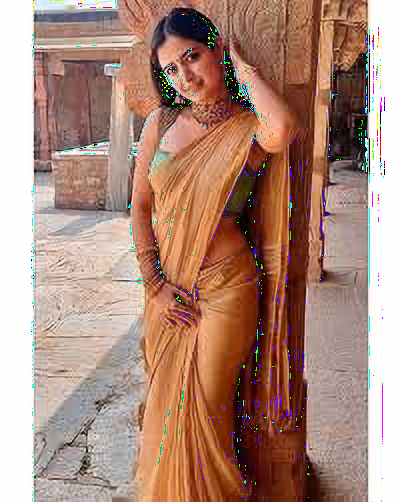

In [66]:
from PIL import Image
import torch
import torchvision.transforms as transforms
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

# Define the path to your uploaded image
image_path = 'download.jpg'

# Load the image using PIL
try:
    img = Image.open(image_path).convert('RGB')
    print(f"Loaded image from {image_path} with size {img.size}")
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
    img = None
except Exception as e:
    print(f"Error loading image: {e}")
    img = None

if img:
    # Convert PIL Image to PyTorch Tensor (CxHxW, float)
    # The model likely expects a tensor input
    transform = transforms.ToTensor()
    img_tensor = transform(img).unsqueeze(0) # Add a batch dimension (1, C, H, W)

    # Ensure the model is in evaluation mode
    model.eval()

    # Perform inference
    with torch.no_grad():
        output_tensor = model(img_tensor)

    # Convert the output tensor back to PIL Image or NumPy array (HxWx3, uint8) for display
    # Remove batch dimension and convert from CxHxW float to HxWxC uint8
    output_tensor = output_tensor.squeeze(0) # Remove batch dimension (C, H, W)
    output_img_pil = transforms.ToPILImage()(output_tensor)

    # Convert PIL Image to NumPy array for cv2_imshow (HxWx3, uint8)
    output_img_np = cv2.cvtColor(np.array(output_img_pil), cv2.COLOR_RGB2BGR) # Convert RGB to BGR for OpenCV

    # Display the super-resolved image
    print("\nDisplaying Super-Resolved Image:")
    cv2_imshow(output_img_np)